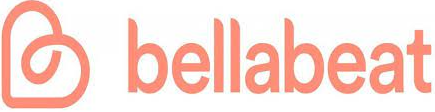

# Introduction
Bellabeat is a high-tech manufacturer of health-focused products for women.In this case study we will analyze smart device fitness data that could help unlock opportunities for growth.  
We will focus on one of the bellabeat products which is the leaf.

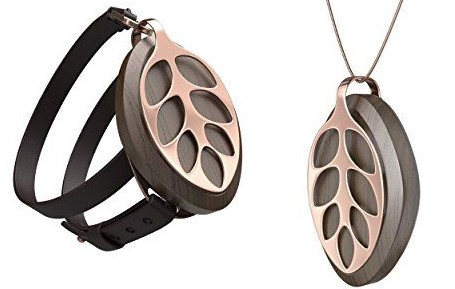

The leaf is a smart bracelet,necklace or clip that tracks activity and sleep which connects to the  bellabeat app tracking sleep, activity and stress.

The stakeholders involved are:     
1. Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer  
2. Sando Mur: Mathematician and Bellabeat’s cofounder  
3. Bellabeat marketing analytics team: A team of data analysts responsible for collecting, analyzing, and reporting data that helps guide Bellabeat’s marketing strategy.   
   
# Data Analysis 
This was done in 6 phases: Ask,Prepare,Process,Analyse,Share and Act phase  
    
# Ask Phase
The major questions the stakeholders had were:  
1. What are some of the trends and smart device technology?  
2. How could these trends apply to bellabeat customers?  
3. How could these trends help influence bellabeat marketing   strategy?  

From the above question, a summary of the business task was developed.  

*Business task*:  
**Identify meaningful marketing strategies that bellabeat can adopt based on  the trends of smart device usage.**      
   
# Prepare Phase
Data used was [FitBit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit) (CC0: Public Domain, data set made available through Mobius)  
This Kaggle data set contains personal fitness tracker from thirty fitbit users.Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring.It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits.  

#  *Limitations of this dataset*
1. The data was previewed and some limitations were observed:
2. The gender of the users is unknown whereas bellabeat caters more to a female clientele
3. The data is not current. It was collected in 2016. the insights derived from the dataset might not reflect to the current trends
4. The sample size is quite small(only 30 users) and might also not derive insights that unbiased  
    
# Process phase 
Data cleaning and processing was done using R.  
Data was loaded into R to begin processing.  
In order to start processing or analyzing, the packages `tidyverse` is installed and libraries loaded.  

In [1]:
#installing packages ad libraries
install.packages("tidyverse")
library(tidyverse)
library(dplyr)
library(lubridate)
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: timechange


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




Load the data needed to begin processing and analysis.

In [2]:
daily_activity <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
sleep_day <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight_log <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

Preview the data to get a sense of what we are working with.

In [3]:
head(daily_activity)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


In [4]:
head(sleep_day)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


In [5]:
head(weight_log)

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>
1,1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,True,1.462234e+12
2,1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,True,1.462320e+12
3,1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,False,1.460510e+12
4,2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,True,1.461283e+12
5,2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,True,1.463098e+12
6,4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,True,1.460938e+12


Check the column names using to identify any relationships between the datasets. 

In [6]:
colnames(daily_activity)

[1] "Id"                       "ActivityDate"            
 [3] "TotalSteps"               "TotalDistance"           
 [5] "TrackerDistance"          "LoggedActivitiesDistance"
 [7] "VeryActiveDistance"       "ModeratelyActiveDistance"
 [9] "LightActiveDistance"      "SedentaryActiveDistance" 
[11] "VeryActiveMinutes"        "FairlyActiveMinutes"     
[13] "LightlyActiveMinutes"     "SedentaryMinutes"        
[15] "Calories"

In [7]:
colnames(sleep_day)

[1] "Id"                 "SleepDay"           "TotalSleepRecords" 
[4] "TotalMinutesAsleep" "TotalTimeInBed"

In [8]:
colnames(weight_log)

[1] "Id"             "Date"           "WeightKg"       "WeightPounds"  
[5] "Fat"            "BMI"            "IsManualReport" "LogId"

The datasets all have column `Id`.Therefore we can check how many distinct Id's each have.

In [9]:
n_distinct(daily_activity$Id)

[1] 33

In [10]:
n_distinct(sleep_day$Id)

[1] 24

In [11]:
n_distinct(weight_log$Id)

[1] 8

Getting some summary statistics from the datasets to further give an insight on the data.  

In [12]:
daily_activity %>%
  select(TotalSteps,
         TotalDistance,
         SedentaryMinutes,
         Calories) %>%
  summary()

   TotalSteps    TotalDistance    SedentaryMinutes    Calories   
 Min.   :    0   Min.   : 0.000   Min.   :   0.0   Min.   :   0  
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.: 729.8   1st Qu.:1828  
 Median : 7406   Median : 5.245   Median :1057.5   Median :2134  
 Mean   : 7638   Mean   : 5.490   Mean   : 991.2   Mean   :2304  
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:1229.5   3rd Qu.:2793  
 Max.   :36019   Max.   :28.030   Max.   :1440.0   Max.   :4900  

In [13]:
sleep_day %>%
  select(TotalSleepRecords,
         TotalMinutesAsleep,
         TotalTimeInBed)%>%
  summary()

 TotalSleepRecords TotalMinutesAsleep TotalTimeInBed 
 Min.   :1.000     Min.   : 58.0      Min.   : 61.0  
 1st Qu.:1.000     1st Qu.:361.0      1st Qu.:403.0  
 Median :1.000     Median :433.0      Median :463.0  
 Mean   :1.119     Mean   :419.5      Mean   :458.6  
 3rd Qu.:1.000     3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :3.000     Max.   :796.0      Max.   :961.0  

In [14]:
weight_log %>%
  select(WeightKg,
         WeightPounds,
         Fat,
         IsManualReport,
         BMI)%>%
  summary()

    WeightKg       WeightPounds        Fat        IsManualReport    
 Min.   : 52.60   Min.   :116.0   Min.   :22.00   Length:67         
 1st Qu.: 61.40   1st Qu.:135.4   1st Qu.:22.75   Class :character  
 Median : 62.50   Median :137.8   Median :23.50   Mode  :character  
 Mean   : 72.04   Mean   :158.8   Mean   :23.50                     
 3rd Qu.: 85.05   3rd Qu.:187.5   3rd Qu.:24.25                     
 Max.   :133.50   Max.   :294.3   Max.   :25.00                     
                                  NA's   :65                        
      BMI       
 Min.   :21.45  
 1st Qu.:23.96  
 Median :24.39  
 Mean   :25.19  
 3rd Qu.:25.56  
 Max.   :47.54  
                

From the summary statistics, the weight_log data frame has some missing values. The _fat_ column has 65 missing values out of the 67 observations. Since we cannot get the users to add in the missing values and we cannot populate, the column was deleted.

In [15]:
#delete column
weight_log <- weight_log[,-5]
colnames(weight_log)

[1] "Id"             "Date"           "WeightKg"       "WeightPounds"  
[5] "BMI"            "IsManualReport" "LogId"

# Analysis Phase
Some exploratory analysis was done to see some of the relationships and/or patterns in the data sets.  
In the graph below, it is clear that there is correlation between number of steps and total distance as one would expect.  

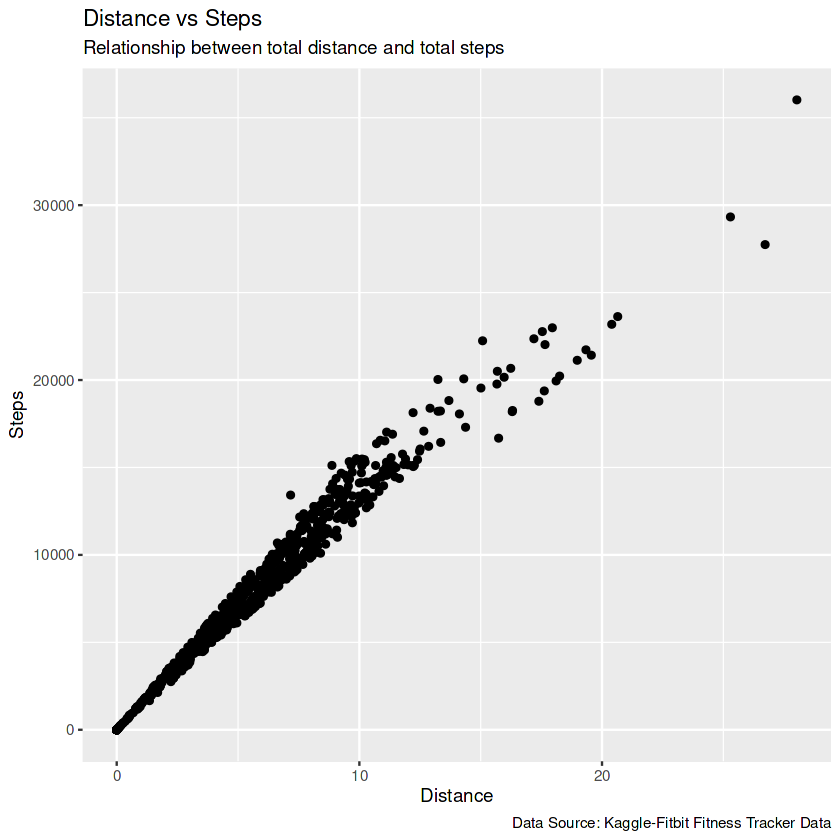

In [16]:
ggplot(data=daily_activity, aes(x=TotalDistance, y=TotalSteps)) +
geom_point(position = "jitter") + 
  labs(x="Distance", y= "Steps", title = "Distance vs Steps", 
       subtitle = "Relationship between total distance and total steps",
       caption = "Data Source: Kaggle-Fitbit Fitness Tracker Data")

In the graph below for sleep dataset, there is a linear correlation between time in bed and minutes asleep as well. 

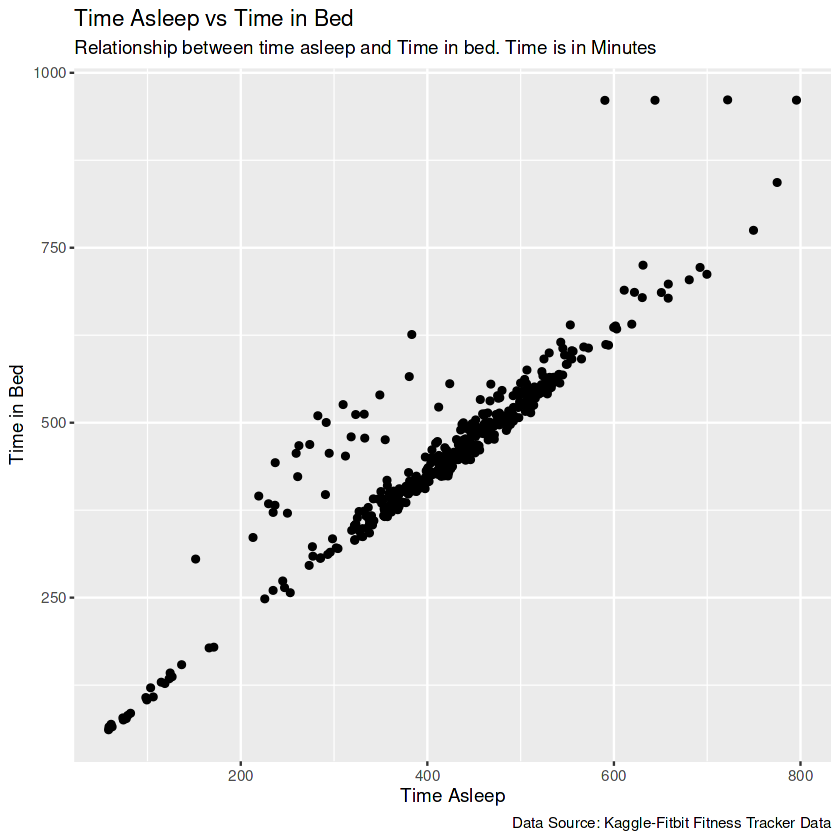

In [17]:
ggplot(data=sleep_day, aes(x=TotalMinutesAsleep, y=TotalTimeInBed)) +
    geom_point(position = "jitter") + 
  labs(x="Time Asleep", y= "Time in Bed",title = "Time Asleep vs Time in Bed", 
       subtitle = "Relationship between time asleep and Time in bed. Time is in Minutes",
       caption = "Data Source: Kaggle-Fitbit Fitness Tracker Data")

For a more in depth analysis the datasets were merged to identify the trend in activity,sleep and weight.

In [18]:
combined_data1 <- merge(daily_activity, sleep_day, by="Id")
combined_data2 <- merge(daily_activity, weight_log, by="Id")

Lets preview the new data frames.The number of distinct users has decreased based on data recorded. 

In [19]:
n_distinct(combined_data1$Id)
colnames(combined_data1)

[1] 24

[1] "Id"                       "ActivityDate"            
 [3] "TotalSteps"               "TotalDistance"           
 [5] "TrackerDistance"          "LoggedActivitiesDistance"
 [7] "VeryActiveDistance"       "ModeratelyActiveDistance"
 [9] "LightActiveDistance"      "SedentaryActiveDistance" 
[11] "VeryActiveMinutes"        "FairlyActiveMinutes"     
[13] "LightlyActiveMinutes"     "SedentaryMinutes"        
[15] "Calories"                 "SleepDay"                
[17] "TotalSleepRecords"        "TotalMinutesAsleep"      
[19] "TotalTimeInBed"

In [20]:
n_distinct(combined_data2$Id)
colnames(combined_data2)

[1] 8

[1] "Id"                       "ActivityDate"            
 [3] "TotalSteps"               "TotalDistance"           
 [5] "TrackerDistance"          "LoggedActivitiesDistance"
 [7] "VeryActiveDistance"       "ModeratelyActiveDistance"
 [9] "LightActiveDistance"      "SedentaryActiveDistance" 
[11] "VeryActiveMinutes"        "FairlyActiveMinutes"     
[13] "LightlyActiveMinutes"     "SedentaryMinutes"        
[15] "Calories"                 "Date"                    
[17] "WeightKg"                 "WeightPounds"            
[19] "BMI"                      "IsManualReport"          
[21] "LogId"

Grouping the data by day of week. The data sets have a date variable therefore day of week can be extracted.The date format was also changed from mm/dd/yyyy to yyyy/mm/dd.This will allow the data to be further anaysed by the day of the week.

In [21]:
daily_activity$ActivityDate <- format(as.Date(daily_activity$ActivityDate,
                                              "%m/%d/%Y"),"%Y/%m/%d")
daily_activity$day_of_week <- strftime(daily_activity$ActivityDate, "%A")
head(daily_activity)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,day_of_week
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<chr>
1,1503960366,2016/04/12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,Tuesday
2,1503960366,2016/04/13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,Wednesday
3,1503960366,2016/04/14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,Thursday
4,1503960366,2016/04/15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,Friday
5,1503960366,2016/04/16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,Saturday
6,1503960366,2016/04/17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,Sunday


How many of the weight observations is logged manually and automatically

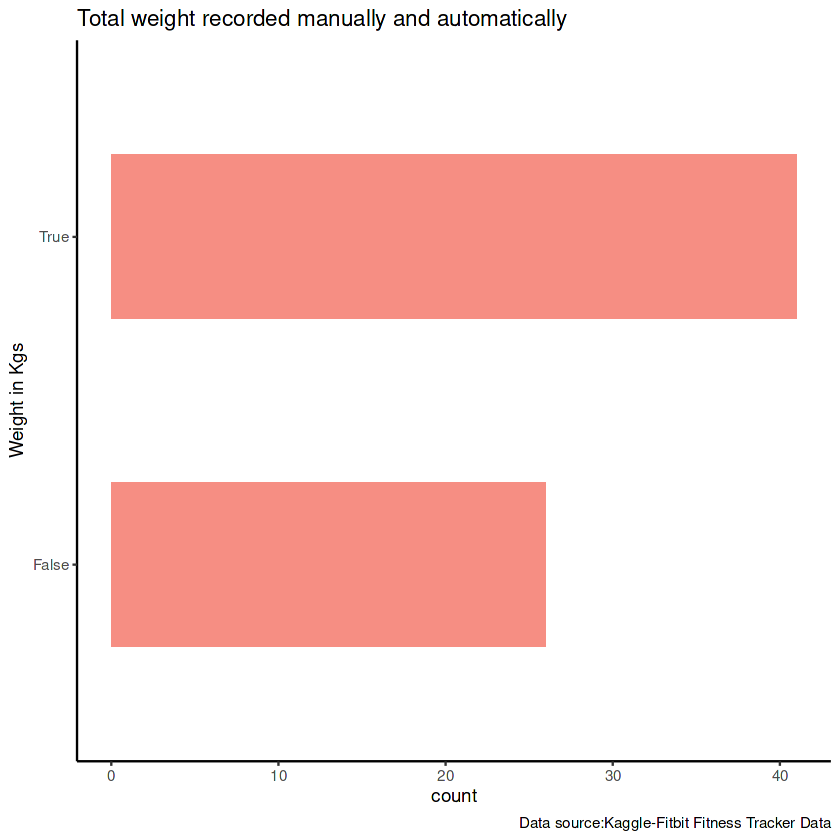

In [22]:
ggplot(weight_log, aes(x = IsManualReport)) +
  geom_bar(position = "dodge",fill="#F68e83", width = 0.5)+ 
  coord_flip() + 
  labs(x= "Weight in Kgs", title = "Total weight recorded manually and automatically",
       caption = "Data source:Kaggle-Fitbit Fitness Tracker Data")+
  theme_classic()

What is the total steps logged per day? Which day has the highest and lowest total steps recorded? 

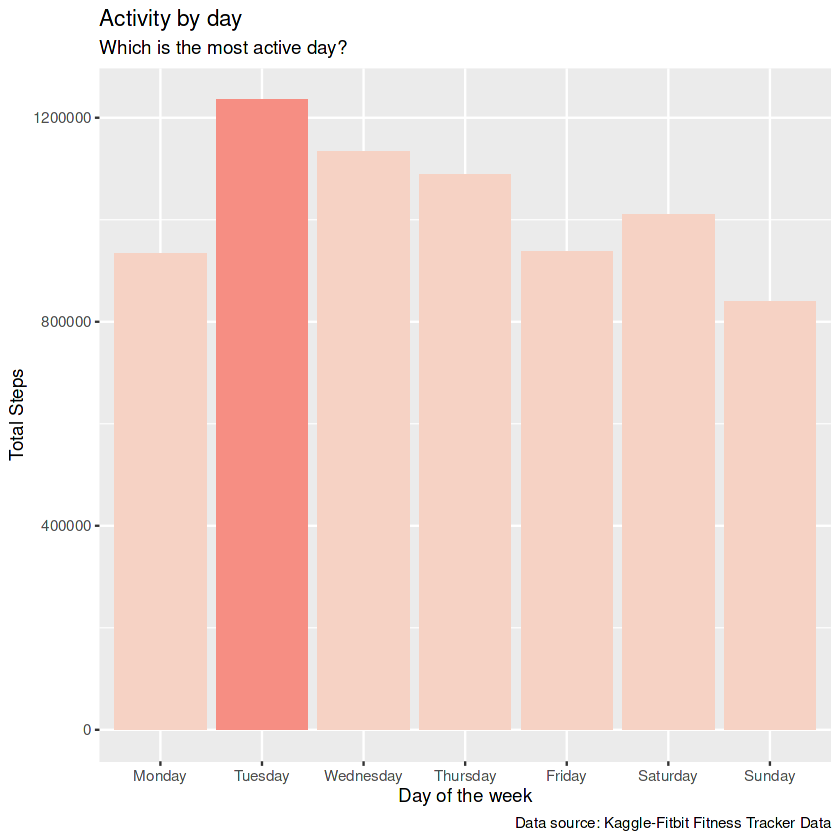

In [23]:
## order the days of the week
daily_activity$day_of_week <- factor(daily_activity$day_of_week, 
                              c("Monday", "Tuesday", "Wednesday",   "Thursday","Friday","Saturday", "Sunday"))
#plotting the graph activity by day of week
ggplot(daily_activity, aes(x= day_of_week, y= TotalSteps, 
                           fill=ifelse(day_of_week == "Tuesday","A","B"))) + 
  geom_col(show.legend = F) +
  scale_fill_manual(values = c(A="#F68e83", B="#f6d2c4"))+
  labs(y="Total Steps" ,x="Day of the week",title = "Activity by day",
       subtitle = "Which is the most active day?",
       caption="Data source: Kaggle-Fitbit Fitness Tracker Data")

What is the relationship between weight recorded and total distance logged? 

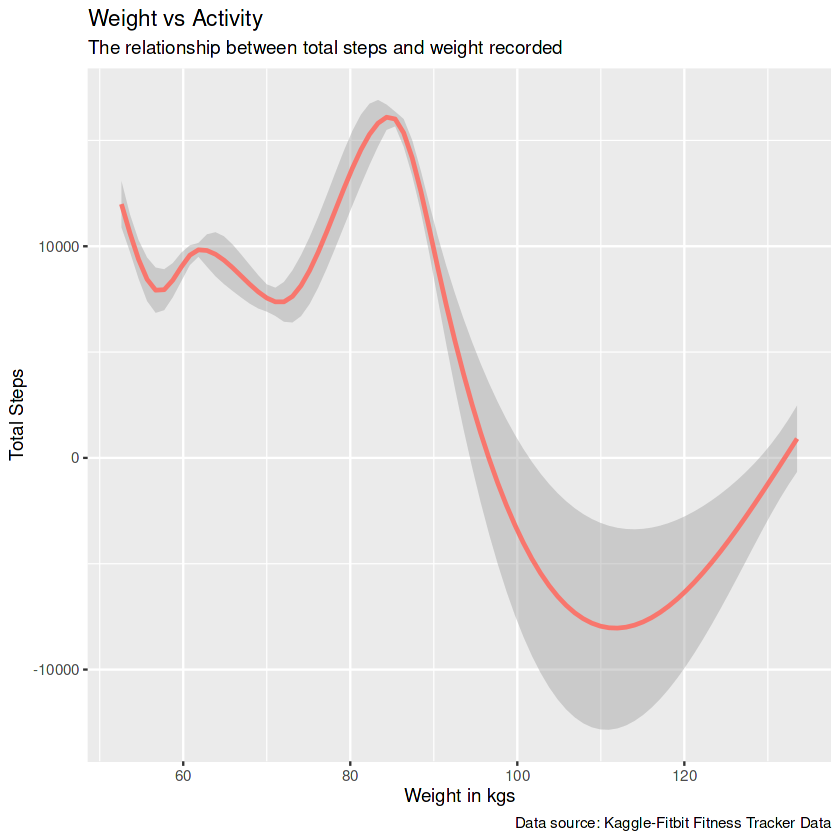

In [24]:
#weight vss activity
ggplot(combined_data2, aes(x= WeightKg, y= TotalSteps,color="#f68e83"))+ 
  geom_smooth(show.legend = F,method = "gam",formula = y~s(x))+
  labs(x="Weight in kgs", y="Total Steps",title="Weight vs Activity",
       subtitle = "The relationship between total steps and weight recorded",
       caption = "Data source: Kaggle-Fitbit Fitness Tracker Data")

What is the relationship between activity and sleep time recorded? 

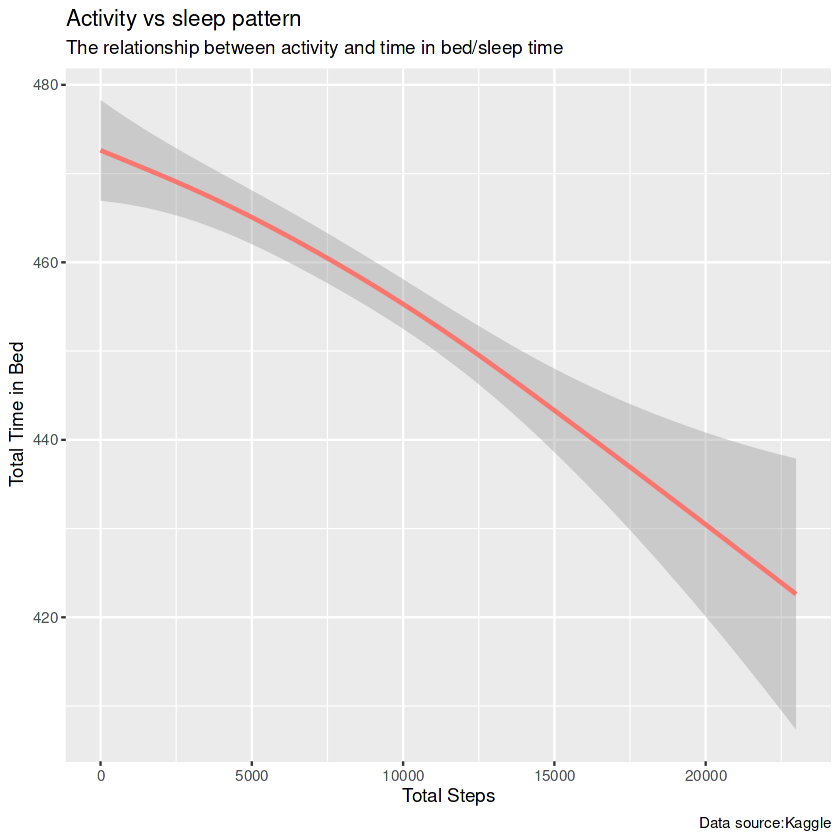

In [25]:
#Activity vs sleep pattern
ggplot(combined_data1, aes(x= TotalSteps, y= TotalTimeInBed,color="#f68e83"))+
  geom_smooth(show.legend = F,method = "gam",formula = y~s(x))+
  labs(x="Total Steps", y="Total Time in Bed",title="Activity vs sleep pattern",
       subtitle = "The relationship between activity and time in bed/sleep time",
       caption = "Data source:Kaggle")

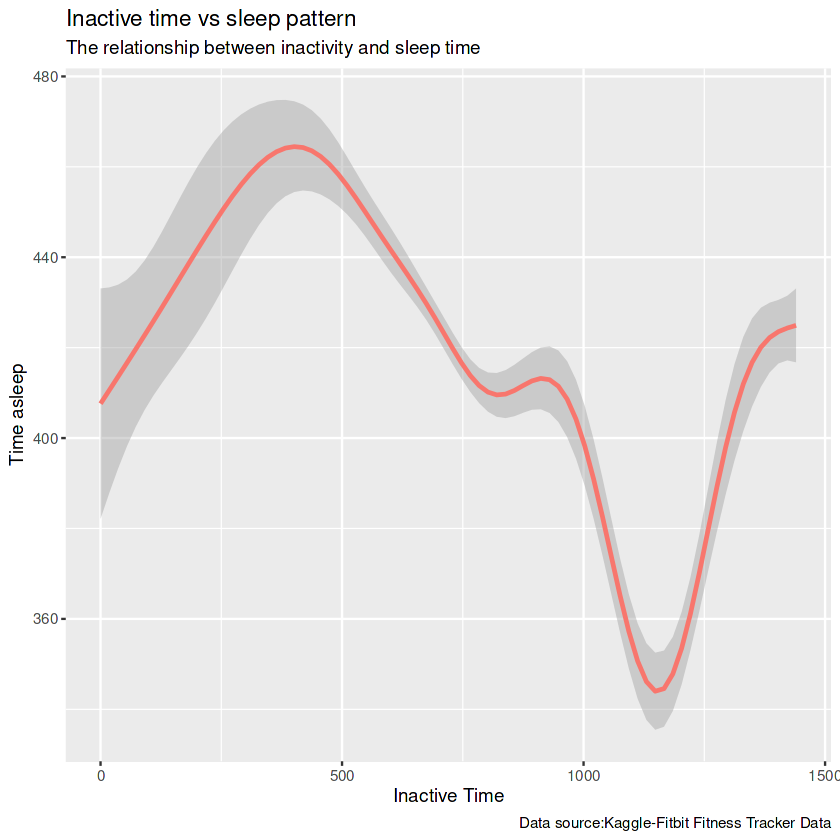

In [26]:
#inactive time vs time asleep
ggplot(combined_data1, aes(x= SedentaryMinutes, y= TotalMinutesAsleep,
                           color="#f68e83"))+
  geom_smooth(show.legend = F,method = "gam",formula = y~s(x))+
  labs(x="Inactive Time", y="Time asleep",title="Inactive time vs sleep pattern",
       subtitle = "The relationship between inactivity and sleep time",
       caption = "Data source:Kaggle-Fitbit Fitness Tracker Data")


# Findings
Based on the analysis done on the data provided, here are some of the findings:  
  1. As expected form initial analysis, there is a positive correlation between time in bed and time asleep as well as between total steps and total distance. More steps directly translates to more distance covered.  
  2. The most active day is Tuesday and the least active day is Friday. The weekends also show less steps compared to the weekday.  
  3. The higher the weight(in kgs) the lower the number of steps recorded. This could mean the heavier the individual the less active they are.  
  4. The The higher the number of steps the less time spent in bed.This shows that the more active and individual is the less time spent in bed.  
  5. The relationship between inactive time and total minutes asleep varies. This could be because not all inactive minutes is when the individual is asleep.This could also be because the individual fails to record sleep time.More data is needed to detect a genuine pattern.
  6. More users prefer to record their weight manually rather than allow the device to record automatically. 
  
    

# Recomendations
Based on the findings derived , some recommendations for the bellabeat company to adopt for their marketing strategy are as follows:  
  1. Collect data explicitly on women using smart devices to better guide the marketing strategies to deploy as this is their market.  
  2. Adopt a system where the app alerts the user when too much time is spent being sedentary.This should allow the user to either be more active or record start of sleep time. 
  3. Allow weight to be recorded manually to allow the user to actually measure themselves thus promoting wellness and accountability which is what bellabeat is known for.  
  4. Include goals in the bellabeat app prompting the user to want to achieve set goals based on the statistic of the individual.Goals such as reach 10000steps today.  
  5. Include fitness tutorials in the app to guide users to continue using the app and devices frequently.Bellabeat could include monthly subscriptions to classes to engage the users further.